<a href="https://colab.research.google.com/github/SJY8179/QuantumAI/blob/main/%EC%A0%9C1%ED%9A%8C_%ED%80%80%ED%85%80AI_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C_baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Quantum Machine learning Guide

이 안내 노트북에서는 양자 컴퓨팅 프레임 워크에 대한 개략적인 소개와 QML의 구현 방법을 알아 봅니다.


다양한 QML framework가 있고 기존 ML framework들과 잘 통합되어 있습니다.
일반적으로는 다음 2 개를 많이 사용합니다.

1. Pennylane: 캐나다 Xanadu에서 만든 양자 컴퓨팅 Framework입니다. 다른 프로젝트들에 비해 머신러닝에 친화적인 인터페이스와 요소를 제공합니다.
2. Qiskit: IBM에서 만든 양자컴퓨팅 Framework입니다. 좀 더 물리적인 실험과 및 대규모 HPC 연산을 포함하는 통합적인 Framework를 제공하고 있습니다.

여기서는 QML 구현을 위해 Pennylane을 사용해 볼 것입니다.

Pennylane은 PyPI에 등록되어 있습니다. 현재 최신 버전은 0.4.x입니다.
다음 명령어로 Python 환경에 `pennylane`을 설치하세요.

Pennylane에 대한 Tutorial과 자세한 사항들은 [Pennylane codebook](https://pennylane.ai/codebook)과 [Demos](https://pennylane.ai/search/?contentType=DEMO&categories=how-to&sort=publication_date) 를 참고하세요.

In [ ]:
!pip install pennylane

## 양자 회로 설계하기

In [ ]:
import pennylane as qml # 일반적으로 qml이란 이름으로 가져옵니다. Quantum Machine Learning의 약자입니다.
import numpy as np

dev = qml.device("default.qubit", wires=3) # device를 정의합니다.

@qml.qnode(dev)
def circuit():
    qml.H(0)
    qml.S(0)
    qml.H(1)
    qml.H(2)
    return qml.probs()

## 양자 회로 그리기

In [ ]:
print(qml.draw(circuit)())

0: ──H──S─┤  Probs
1: ──H────┤  Probs
2: ──H────┤  Probs


(<Figure size 500x400 with 1 Axes>, <Axes: >)

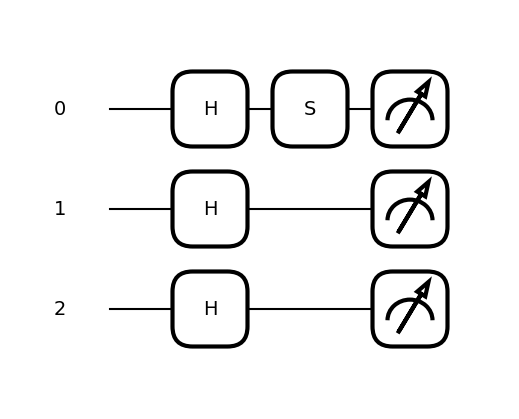

In [ ]:
qml.draw_mpl(circuit)()

|양자 회로| ML|
|:--:|:--:|
|Quantum Circuit| Layer, ML Module|
|Backend | device(CPU, CUDA, ...)|

## Backend

Backend는 실제 양자 회로를 구동하는 시뮬레이터, 혹은 양자 컴퓨터입니다. 한 개의 회로를 어느 기기에서 돌릴 지 미리 선언을 해주어야 합니다.


**Backend 선택하기**

다양한 Backend를 양자 회로를 돌리는 데 사용할 수 있습니다. Pennylaned의 `default.qubit`, `lightning.qubit`등 뿐만 아니라, Qiskit, IQM 등 실제 양자 컴퓨터의 Backend interface를 가져와 사용할 수도 있습니다.
그러나, QML을 구현하고 시험해 볼 때는 `default.qubit`이 권장됩니다. 다른 ML 프레임워크와의 결합도 간편할 뿐더러 가장 빠른 differentiation 방법을 제공합니다.

Backend 선택과 개별 device에 대한 정보는 Pennylane의 공식 문서: [Quantum Devices](https://pennylane.ai/devices)를 참고하세요.

In [ ]:
NUMBER_OF_WIRES =20
dev = qml.device("default.qubit", wires=NUMBER_OF_WIRES, shots=3000)

## 측정하기

- `qml.probs`: 개별 state들의 측정 확률 벡터입니다. $N$ qubit에 대해 $2^N$ 크기를 가집니다.
- `qml.expval`: Pennylane의 Observable들을 측정합니다. 기초적으로 `qml.PauliZ(i), qml.PauliX(i), qml.PauliY(i)`가 있으며 이들을 조합 하거나/여러개의 Observable을 측정할 수 있습니다.

In [ ]:
dev_3 = qml.device("default.qubit", wires=3)

@qml.qnode(dev_3)
def circuit1():
    qml.H(0)
    qml.H(1)
    return qml.expval(qml.PauliX(0))
@qml.qnode(dev_3)
def circuit2():
    qml.H(0)
    qml.H(1)
    return qml.probs()
@qml.qnode(dev_3)
def circuit3():
    qml.H(0)
    qml.H(1)
    return [qml.expval(qml.PauliZ(i)) for i in range(3)]


In [ ]:
circuit1()

np.float64(0.9999999999999996)

In [ ]:
circuit2()

array([0.25, 0.  , 0.25, 0.  , 0.25, 0.  , 0.25, 0.  ])

In [ ]:
circuit3()

[np.float64(0.0), np.float64(0.0), np.float64(0.9999999999999996)]

In [ ]:
obs = qml.PauliZ(0) @ qml.PauliX(1)
obs

Z(0) @ X(1)

In [ ]:
@qml.qnode(dev_3)
def circuit4():
    qml.H(0)
    qml.H(1)
    qml.H(2)
    return qml.expval(obs)

In [ ]:
circuit4()

np.float64(0.0)

## 양자 회로의 설계

In [ ]:
from pennylane import numpy as np_p

In [ ]:
dev = qml.device("default.qubit", wires=1)
@qml.qnode(dev)
def single_qubit_circuit(theta, input_value):
    qml.RX(theta, wires=0)
    qml.RY(input_value, wires=0)
    return qml.expval(qml.PauliZ(0))


In [ ]:
single_qubit_circuit(0.1, 0.2) # Customized numpy result

np.float64(0.9751703272018161)

In [ ]:
#Batched data
theta = 0.032
theta_b = np_p.array([0.2, 0.3, 0.5])
input_value_b = np_p.array([3.2, 1.2, 0.1])


In [ ]:
single_qubit_circuit(theta_b, input_value_b) # Parameter가 모두 Batched parameter

tensor([-0.97839534,  0.34617358,  0.8731983 ], requires_grad=True)

In [ ]:
single_qubit_circuit(theta, input_value_b) # Single, batched parameter 조합

tensor([-0.99778369,  0.36217224,  0.99449477], requires_grad=True)

#### Pennylane Optimizer

In [ ]:
opt = qml.GradientDescentOptimizer(stepsize=0.01)
max_iterations = 500
conv_tol = 1e-06
param = np_p.random.rand(1, requires_grad=True)

his_param = []
his_energy = []
for i in range(max_iterations):
    param, prev_energy = opt.step_and_cost(lambda x: single_qubit_circuit(x, input_value_b[0]), param)
    his_param.append(param)
    his_energy.append(prev_energy)
    energy = single_qubit_circuit(param, input_value_b[0])
    conv = np_p.abs(prev_energy - energy)
    if conv <= conv_tol:
        break


In [ ]:
import matplotlib.pyplot as plt

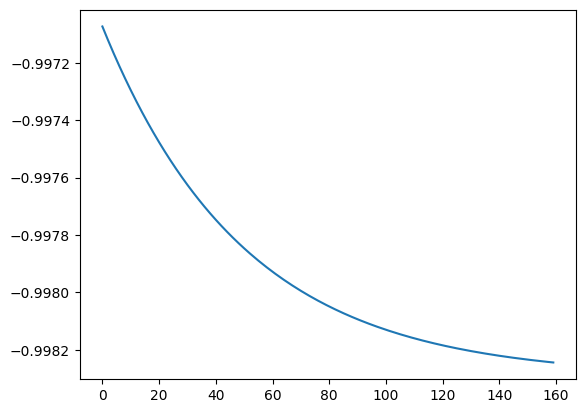

In [ ]:
plt.plot(his_energy)

### Torch integration

In [ ]:
import torch
from torch.optim import Adam
from torch.nn.parameter import Parameter
from torch.nn import NLLLoss


In [ ]:
torch_theta = torch.rand(4)
torch_phi = torch.rand(4)
single_qubit_circuit(torch_theta, torch_phi) # Torch tensor의 경우 자동으로 tensor array로 변환

tensor([0.7709, 0.4861, 0.7113, 0.5753])

In [ ]:
parameter = Parameter(torch.tensor( torch.rand(1).item(), requires_grad = True))
parameter

Parameter containing:
tensor(0.0982, requires_grad=True)

In [ ]:
optim = Adam([parameter], lr= 0.001)

In [ ]:
input_data = torch.rand(1)
history_e  =[]
for i in range(1000):
    optim.zero_grad()
    result = single_qubit_circuit(input_data, parameter)+1
    loss = (result)
    loss.backward()
    history_e.append(result.item())
    optim.step()

In [ ]:
import matplotlib.pyplot as plt

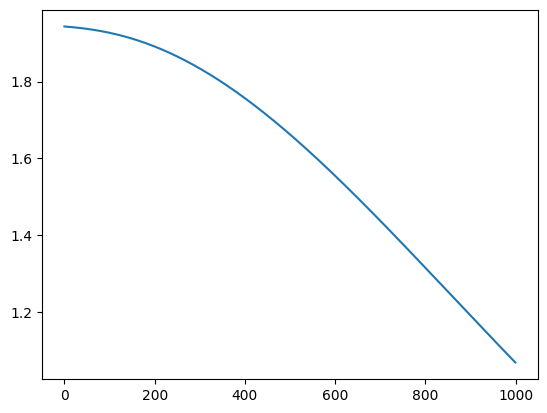

In [ ]:
plt.plot(history_e)

# 분류 모델 만들기

## 0-1 binary classfiers

### Fashion MINIST dataset

In [ ]:
import torch
from torch.utils.data import Subset
from torch.utils.data import DataLoader
import torchvision

In [ ]:
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,), (0.5,))
        ])

label_map = {0: 0, 6: 1}
target_transform = lambda y: label_map.get(y, y)   # 0은 0, 6은 1
train_dataset = torchvision.datasets.FashionMNIST(
    "./", train=True, download=True,
    transform=transform,
    target_transform=target_transform
)
test_dataset = torchvision.datasets.FashionMNIST(
    "./", train=False, download=True,
    transform=transform,
    target_transform=target_transform
)

In [ ]:
t_targets = train_dataset.targets
test_targets = test_dataset.targets

In [ ]:
t_mask = (t_targets ==0) | (t_targets==6)
t_indices = torch.where(t_mask)[0]
zero_one_dataset_train = Subset(train_dataset, t_indices)

test_mask = (test_targets ==0 ) | (test_targets ==6)
test_indices = torch.where(test_mask)[0]
zero_one_dataset_test = Subset(test_dataset, test_indices)

In [ ]:
train_loader = DataLoader(zero_one_dataset_train, batch_size = 1, shuffle =True)

In [ ]:
from matplotlib import pyplot as plt

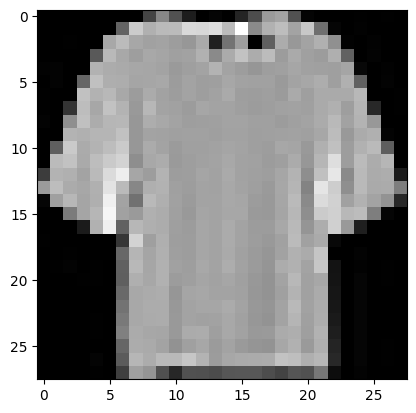

In [ ]:
plt.imshow(zero_one_dataset_train[20][0][0], cmap="grey")

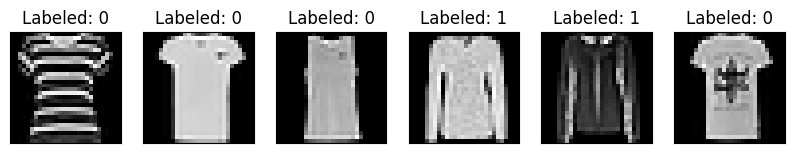

In [ ]:
n_samples_show = 6

data_iter = iter(train_loader)
fig, axes = plt.subplots(nrows=1, ncols=n_samples_show, figsize=(10, 3))

while n_samples_show > 0:
    images, targets = data_iter.__next__()

    axes[n_samples_show - 1].imshow(images[0, 0].numpy().squeeze(), cmap="gray")
    axes[n_samples_show - 1].set_xticks([])
    axes[n_samples_show - 1].set_yticks([])
    axes[n_samples_show - 1].set_title("Labeled: {}".format(targets[0].item()))

    n_samples_show -= 1



In [ ]:
from torch.nn import Module
import torch.nn.functional as F
from torch.nn import Conv2d, Dropout2d, Linear
from torch import cat

In [ ]:
torch.set_default_dtype(torch.float64)
class BinaryClassifier(Module):
    def __init__(self):
        super().__init__()
        self.conv1 = Conv2d(1, 2, kernel_size=5)
        self.conv2 = Conv2d(2, 16, kernel_size=5)
        self.dropout = Dropout2d()
        self.fc1 = Linear(256, 64)
        self.fc2 = Linear(64, 2)
        self.fc3 = Linear(1, 1)

        # Quantum layer
        self.q_device = qml.device("default.qubit", wires=2)
        self.qnn_params = Parameter(torch.rand(8), requires_grad= True)
        self.obs = qml.PauliZ(0) @ qml.PauliZ(1)

        @qml.qnode(self.q_device)
        def circuit(x):
            qml.H(wires=0)
            qml.H(wires=1)

            qml.RZ(2.*x[0], wires=0)
            qml.RZ(2.*x[1], wires=0)

            qml.CNOT(wires=[0, 1])
            qml.RZ(2.*(torch.pi - x[0])*(torch.pi - x[1]), wires=1)
            qml.CNOT(wires=[0, 1])
            #------------------------------------------
            qml.RY(2.*self.qnn_params[0], wires=0)
            qml.RY(2.*self.qnn_params[1], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2.*self.qnn_params[2], wires=0)
            qml.RY(2.*self.qnn_params[3], wires=1)
            qml.CNOT(wires=[1, 0])
            qml.RY(2.*self.qnn_params[4], wires=0)
            qml.RY(2.*self.qnn_params[5], wires=1)
            qml.CNOT(wires=[0, 1])
            qml.RY(2.*self.qnn_params[6], wires=0)
            qml.RY(2.*self.qnn_params[7], wires=1)

            return qml.expval(self.obs)

        self.qnn = circuit

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        x = self.dropout(x)
        x = x.view(-1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        x = self.qnn(x).view(1,)  # apply QNN
        x = self.fc3(x)
        return F.log_softmax(cat((x, 1 - x), -1), -1)

In [ ]:
bc = BinaryClassifier()

In [ ]:
# ───── 학습 전에 회로 제약 먼저 점검 ─────
import pennylane as qml, torch

dummy_x = torch.tensor([0.0, 0.0], dtype=torch.float64)
specs = qml.specs(bc.qnn)(dummy_x)

In [ ]:
specs

{'resources': Resources(num_wires=2, num_gates=18, gate_types=defaultdict(<class 'int'>, {'Hadamard': 2, 'RZ': 3, 'CNOT': 5, 'RY': 8}), gate_sizes=defaultdict(<class 'int'>, {1: 13, 2: 5}), depth=13, shots=Shots(total_shots=None, shot_vector=())),
 'errors': {},
 'num_observables': 1,
 'num_trainable_params': 8,
 'num_device_wires': 2,
 'num_tape_wires': 2,
 'device_name': 'default.qubit',
 'level': 'gradient',
 'gradient_options': {},
 'interface': 'auto',
 'diff_method': 'best',
 'gradient_fn': 'backprop'}

In [ ]:
assert specs["num_tape_wires"] <= 8,  "❌ 큐빗 수 초과"
assert specs['resources'].depth <= 30, "❌ 회로 깊이 초과"
assert specs["num_trainable_params"]<= 60, "❌ 학습 파라미터 수 초과"

print("✅ 회로 제약 통과 — 학습을 계속합니다")

✅ 회로 제약 통과 — 학습을 계속합니다


In [ ]:
len(iter(train_loader))

12000

In [ ]:
data, target = next(iter(train_loader))

In [ ]:
optimizer = Adam(bc.parameters(), lr=0.0001)
loss_func  = NLLLoss()

epochs = 3
loss_history = []
bc.train()

BinaryClassifier(
  (conv1): Conv2d(1, 2, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(2, 16, kernel_size=(5, 5), stride=(1, 1))
  (dropout): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=256, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (fc3): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
data.shape

torch.Size([1, 1, 28, 28])

In [ ]:
from tqdm import tqdm

for epoch in range(epochs):
    total_loss = []
    for bidx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad(set_to_none=True)

        output = bc(data)
        loss = loss_func(output, target.squeeze())
        total_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        if bidx%100 ==0:
            print(bidx)
    loss_history.append(sum(total_loss)/len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_history[-1]))


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
Training [59%]	Loss: 0.2453
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
Training [60%]	Loss: 0.2368
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
20

In [ ]:
# ───────────────── 로더 · 예측 · 평가 · CSV ─────────────────
test_loader = DataLoader(
    test_dataset,            # ← 풀 세트로 교체
    batch_size=1,            # x.view(-1) 문제 있으니 1이 안전
    shuffle=False
)

all_preds, all_targets = [], []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        out = bc(data)

        # 0/1 클래스로 변환
        if out.ndim == 0 or (out.ndim == 1 and out.numel() == 1):
            pred = (out > 0).long().unsqueeze(0)
        else:
            pred = out.argmax(dim=-1).view(-1)

        all_preds.append(pred.cpu())
        all_targets.append(target.view(-1).cpu())

y_pred = torch.cat(all_preds).numpy().astype(int)
y_true = torch.cat(all_targets).numpy().astype(int)

# 1 → 6 매핑
y_pred_mapped = np.where(y_pred == 1, 6, y_pred)

# 0·6 라벨만 평가
mask = (y_true == 0) | (y_true == 6)
print("총 샘플:", len(mask))        # 10 000
print("평가 대상:", mask.sum())     # 2 000 (0·6)

acc = (y_pred_mapped[mask] == y_true[mask]).mean()
print(f"Filtered accuracy (labels 0/6 only): {acc:.4f}")

# CSV 저장
np.savetxt("y_pred.csv", y_pred_mapped, fmt="%d")
print("Saved y_pred.csv ✔")
# ───────────────────────────────────────────────────────────


총 샘플: 10000
평가 대상: 1000
Filtered accuracy (labels 0/6 only): 0.8700
Saved y_pred.csv ✔


In [ ]:
# prompt: y_pred.csv 파일을 로컬 pc로 자동으로 바로 다운로드 가능하게 하는 코랩 코드는?

from google.colab import files

files.download("y_pred.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>